In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Pima_dataset/diabetes.csv')

In [3]:
X = data.drop(["Outcome"], axis=1)
y = data["Outcome"]

## Feature Selection/Reduction

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
scaler = StandardScaler()
MinMaxScaler = MinMaxScaler()
lr = LogisticRegression(max_iter=10000, tol=0.01)

### Select K Best

In [7]:
selectK = SelectKBest(chi2)

In [9]:
pipe = Pipeline(steps=[("MinMaxScaler", MinMaxScaler), ("selectK", selectK), ("lr", lr)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "selectK__k": range(1, X.shape[1]+1),
    "lr__C": np.logspace(-4, 4, 20),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.778):
{'lr__C': 78.47599703514607, 'selectK__k': 6}
Test accuracy:0.740


In [10]:
selectK = SelectKBest(chi2, k=search.best_params_['selectK__k'])
preprocess_selectK = Pipeline(steps=[("MinMaxScaler", MinMaxScaler), ("selectK", selectK)])

In [10]:
train_scores = []
test_scores = []

for n in range(1, X.shape[1]+1):
    selectK = SelectKBest(chi2, k=n)
    pipe = Pipeline(steps=[("MinMaxScaler", MinMaxScaler), ("selectK", selectK), ("lr", lr)])
    param_grid = {
    "lr__C": np.logspace(-4, 4, 20),
    }
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_train, y_train)
    train_scores.append(search.best_score_)
    test_scores.append(search.score(X_test, y_test))
    print("Select %d best" % n)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

Select 1 best
Best parameter (CV score=0.665):
{'lr__C': 4.281332398719396}
Select 2 best
Best parameter (CV score=0.747):
{'lr__C': 1.623776739188721}
Select 3 best
Best parameter (CV score=0.743):
{'lr__C': 0.615848211066026}
Select 4 best
Best parameter (CV score=0.747):
{'lr__C': 0.615848211066026}
Select 5 best
Best parameter (CV score=0.776):
{'lr__C': 4.281332398719396}
Select 6 best
Best parameter (CV score=0.778):
{'lr__C': 78.47599703514607}
Select 7 best
Best parameter (CV score=0.776):
{'lr__C': 11.288378916846883}
Select 8 best
Best parameter (CV score=0.776):
{'lr__C': 11.288378916846883}


Text(0.5, 0, 'Select k Best')

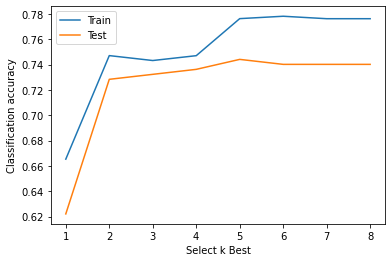

In [11]:
plt.plot(figsize=(3, 6))

plt.plot(np.arange(1, X.shape[1] + 1), train_scores, label='Train')
plt.plot(np.arange(1, X.shape[1] + 1), test_scores, label='Test')
plt.ylabel("Classification accuracy")
plt.legend()

plt.xlabel("Select k Best")

### PCA

In [11]:
pca = PCA()

In [12]:
pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("lr", lr)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": range(1, X.shape[1]+1),
    "lr__C": np.logspace(-4, 4, 20),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.778):
{'lr__C': 0.615848211066026, 'pca__n_components': 6}
Test accuracy:0.732


In [13]:
pca = PCA(n_components=search.best_params_["pca__n_components"])
lr = LogisticRegression(max_iter=10000, tol=0.1, C=search.best_params_["lr__C"])

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("lr", lr)])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7322834645669292

In [14]:
pca = PCA(n_components=search.best_params_["pca__n_components"])
preprocess_pca = Pipeline(steps=[("scaler", scaler), ("pca", pca)])

In [16]:
train_scores = []
test_scores = []

for n in range(1, X.shape[1]+1):
    pca = PCA(n_components=n)
    pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("lr", lr)])
    param_grid = {
    "lr__C": np.logspace(-4, 4, 20),
    }
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_train, y_train)
    train_scores.append(search.best_score_)
    test_scores.append(search.score(X_test, y_test))
    print("PCA: n =" + str(n))
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

PCA: n =1
Best parameter (CV score=0.745):
{'lr__C': 0.03359818286283781}
PCA: n =2
Best parameter (CV score=0.733):
{'lr__C': 0.03359818286283781}
PCA: n =3
Best parameter (CV score=0.737):
{'lr__C': 0.615848211066026}
PCA: n =4
Best parameter (CV score=0.732):
{'lr__C': 0.012742749857031334}
PCA: n =5
Best parameter (CV score=0.753):
{'lr__C': 0.615848211066026}
PCA: n =6
Best parameter (CV score=0.778):
{'lr__C': 0.615848211066026}
PCA: n =7
Best parameter (CV score=0.778):
{'lr__C': 4.281332398719396}
PCA: n =8
Best parameter (CV score=0.772):
{'lr__C': 1.623776739188721}


In [17]:
pca = PCA(n_components=8)
pca.fit(X_train)

PCA(n_components=8)

Text(0.5, 0, 'n_components')

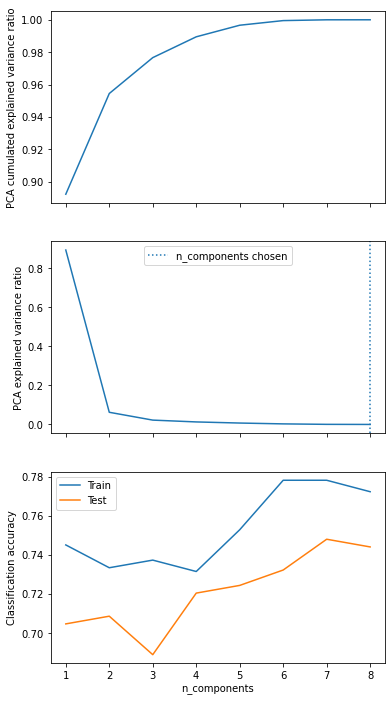

In [18]:
# Plot the PCA spectrum

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(6, 12))
ax0.plot(np.arange(1, pca.n_components + 1), np.cumsum((pca.explained_variance_ratio_)))
ax0.set_ylabel("PCA cumulated explained variance ratio")

ax1.plot(np.arange(1, pca.n_components + 1), pca.explained_variance_ratio_)
ax1.set_ylabel("PCA explained variance ratio")

ax1.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax1.legend()

ax2.plot(np.arange(1, pca.n_components + 1), train_scores, label='Train')
ax2.plot(np.arange(1, pca.n_components + 1), test_scores, label='Test')
ax2.set_ylabel("Classification accuracy")
ax2.legend()

ax2.set_xlabel("n_components")

In [15]:
pca = PCA(n_components=search.best_estimator_.named_steps["pca"].n_components)
preprocess_pca = Pipeline(steps=[("scaler", scaler), ("pca", pca)])

### KMeans Reduction (X)
https://mclguide.readthedocs.io/en/latest/sklearn/clusterdim.html

## Modeling

* https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_approximation.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-approximation-py
* https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html

In [20]:
preprocess_pca

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=8))])

In [21]:
preprocess_selectK

Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('selectK',
                 SelectKBest(k=6,
                             score_func=<function chi2 at 0x7fd6919ac430>))])

### SVM

In [34]:
from sklearn import svm

svm = svm.SVC(probability=True)

In [23]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "C": np.logspace(0, 4, 2),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}
search = GridSearchCV(svm, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.772):
{'C': 1.0, 'kernel': 'linear'}
Test accuracy:0.756


              precision    recall  f1-score   support

  No Diabete       0.81      0.83      0.82       168
     Diabete       0.65      0.62      0.63        86

    accuracy                           0.76       254
   macro avg       0.73      0.72      0.72       254
weighted avg       0.75      0.76      0.75       254



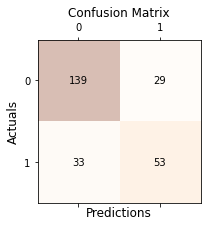

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.best_estimator_.predict(X_test)
y_pred_proba = search.best_estimator_.predict_proba(X_test)[:, 1]
# roc_auc_score(y_test, y_pred)

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.8030869324473976


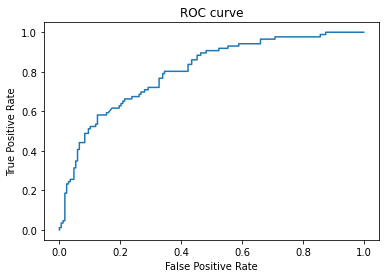

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [36]:
pca_svm_pipe = Pipeline(steps=[("preprocess_pca", preprocess_pca), ("svm", svm)])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "svm__C": np.logspace(0, 4, 20),
    "svm__kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}
search = GridSearchCV(pca_svm_pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.770):
{'svm__C': 1.0, 'svm__kernel': 'linear'}
Test accuracy:0.752


              precision    recall  f1-score   support

  No Diabete       0.81      0.82      0.81       168
     Diabete       0.64      0.62      0.63        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



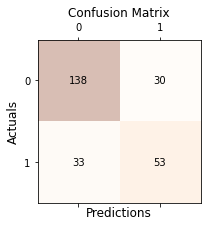

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.best_estimator_.predict(X_test)
y_pred_proba = search.best_estimator_.predict_proba(X_test)[:, 1]
# roc_auc_score(y_test, y_pred)

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.8026024363233666


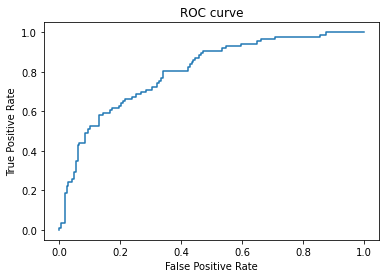

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [39]:
selectK_svm_pipe = Pipeline(steps=[("preprocess_selectK", preprocess_selectK), ("svm", svm)])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "svm__C": np.logspace(0, 4, 20),
    "svm__kernel": ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}
search = GridSearchCV(pca_svm_pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.770):
{'svm__C': 1.0, 'svm__kernel': 'linear'}
Test accuracy:0.752


              precision    recall  f1-score   support

  No Diabete       0.81      0.82      0.81       168
     Diabete       0.64      0.62      0.63        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



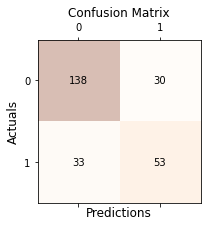

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.best_estimator_.predict(X_test)
y_pred_proba = search.best_estimator_.predict_proba(X_test)[:, 1]
# roc_auc_score(y_test, y_pred)

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.8026024363233666


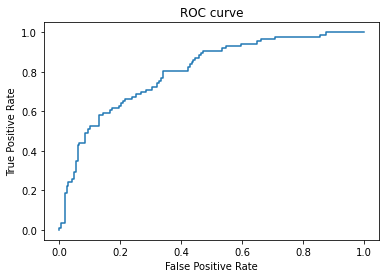

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

In [36]:
search = svm
search.fit(X_lda_train, y_train)

SVC(probability=True)

              precision    recall  f1-score   support

  No Diabete       0.79      0.83      0.81       168
     Diabete       0.64      0.57      0.60        86

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.71       254
weighted avg       0.74      0.74      0.74       254



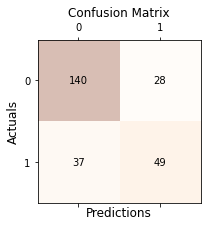

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_lda_test)
y_pred_proba = search.predict_proba(X_lda_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7773394241417497


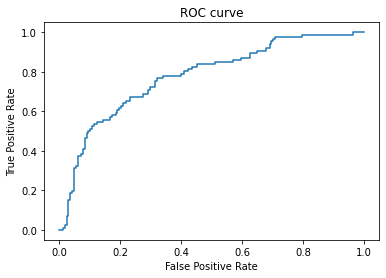

In [38]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

### AdaBoost

In [42]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=42)

In [43]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "n_estimators": range(0, 81, 2)
}
search = GridSearchCV(adb, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.765):
{'n_estimators': 10}
Test accuracy:0.768


In [44]:
pca_adb_pipe = Pipeline(steps=[("preprocess_pca", preprocess_pca), ("adb", adb)])

param_grid = {
    "adb__n_estimators": range(0, 81, 2),
}
search = GridSearchCV(pca_adb_pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.761):
{'adb__n_estimators': 16}
Test accuracy:0.713


              precision    recall  f1-score   support

  No Diabete       0.78      0.78      0.78       168
     Diabete       0.57      0.58      0.58        86

    accuracy                           0.71       254
   macro avg       0.68      0.68      0.68       254
weighted avg       0.71      0.71      0.71       254



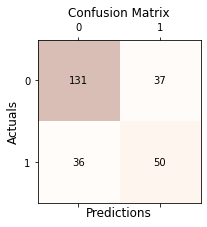

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.best_estimator_.predict(X_test)
y_pred_proba = search.best_estimator_.predict_proba(X_test)[:, 1]
# roc_auc_score(y_test, y_pred)

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7853682170542636


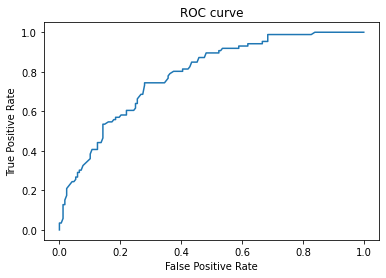

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [47]:
selectK_adb_pipe = Pipeline(steps=[("preprocess_selectK", preprocess_selectK), ("adb", adb)])

param_grid = {
    "adb__n_estimators": range(0, 81, 2),
}
search = GridSearchCV(selectK_adb_pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.763):
{'adb__n_estimators': 10}
Test accuracy:0.768


              precision    recall  f1-score   support

  No Diabete       0.82      0.83      0.83       168
     Diabete       0.66      0.64      0.65        86

    accuracy                           0.77       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254



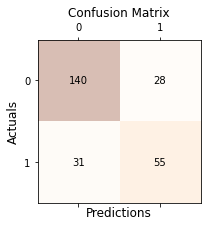

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.best_estimator_.predict(X_test)
y_pred_proba = search.best_estimator_.predict_proba(X_test)[:, 1]
# roc_auc_score(y_test, y_pred)

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.811392580287929


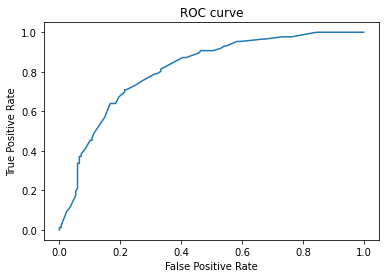

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

In [111]:
param_grid = {
    "n_estimators": range(0, 81, 2),
}
search = GridSearchCV(adb, param_grid, n_jobs=2)
search.fit(X_lda_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_lda_test, y_test))

Best parameter (CV score=0.766):
{'n_estimators': 54}
Test accuracy:0.740


              precision    recall  f1-score   support

  No Diabete       0.79      0.82      0.81       168
     Diabete       0.62      0.58      0.60        86

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.74      0.74      0.74       254



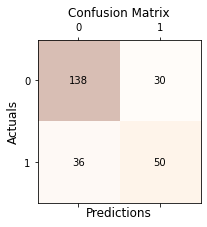

In [112]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_lda_test)
y_pred_proba = search.predict_proba(X_lda_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7761973975636765


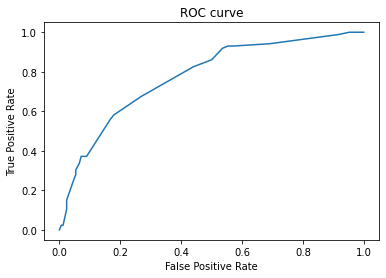

In [113]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

### XGBoost

https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [60]:
print(y[y==0].count(), y[y==1].count())

500 268


In [51]:
import xgboost

xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

[19:02:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tracyliu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

  No Diabete       0.81      0.74      0.77       168
     Diabete       0.57      0.65      0.61        86

    accuracy                           0.71       254
   macro avg       0.69      0.70      0.69       254
weighted avg       0.72      0.71      0.72       254



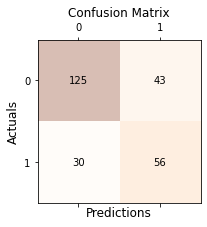

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7828073089700998


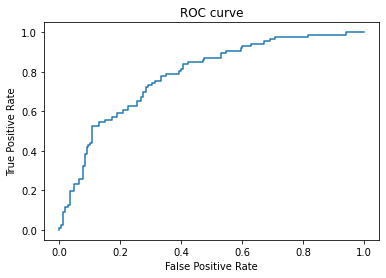

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [65]:
xgb = xgboost.XGBClassifier()

In [66]:
pca_xgb = Pipeline(steps=[("preprocess_pca", preprocess_pca), ("xgb", xgb)])
pca_xgb.fit(X_train, y_train)

[19:08:57] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tracyliu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Pipeline(steps=[('preprocess_pca',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca', PCA(n_components=8))])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_

              precision    recall  f1-score   support

  No Diabete       0.76      0.79      0.78       168
     Diabete       0.56      0.52      0.54        86

    accuracy                           0.70       254
   macro avg       0.66      0.66      0.66       254
weighted avg       0.70      0.70      0.70       254



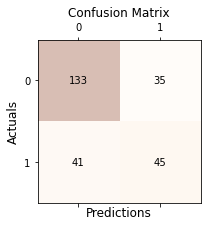

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = pca_xgb.predict(X_test)
y_pred_proba = pca_xgb.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.751453488372093


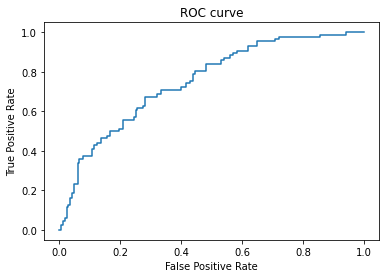

In [68]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [69]:
selectK_xgb = Pipeline(steps=[("preprocess_selectK", preprocess_selectK), ("xgb", xgb)])
selectK_xgb.fit(X_train, y_train)

[19:13:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/tracyliu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Pipeline(steps=[('preprocess_selectK',
                 Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                                 ('selectK',
                                  SelectKBest(k=6,
                                              score_func=<function chi2 at 0x7fd6919ac430>))])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_

              precision    recall  f1-score   support

  No Diabete       0.81      0.76      0.78       168
     Diabete       0.58      0.64      0.61        86

    accuracy                           0.72       254
   macro avg       0.69      0.70      0.70       254
weighted avg       0.73      0.72      0.72       254



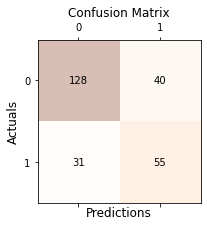

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = selectK_xgb.predict(X_test)
y_pred_proba = selectK_xgb.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.777062569213732


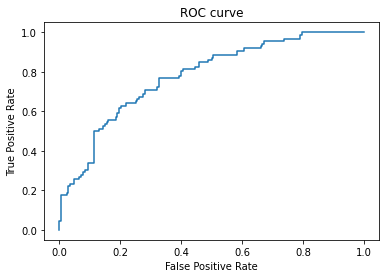

In [71]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

In [117]:
search = xgb
search.fit(X_lda_train, y_train)

[20:08:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

  No Diabete       0.80      0.79      0.80       168
     Diabete       0.60      0.63      0.61        86

    accuracy                           0.73       254
   macro avg       0.70      0.71      0.70       254
weighted avg       0.74      0.73      0.73       254



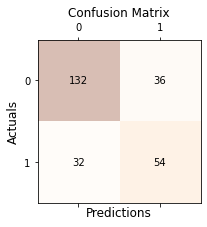

In [118]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_lda_test)
y_pred_proba = search.predict_proba(X_lda_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7796926910299004


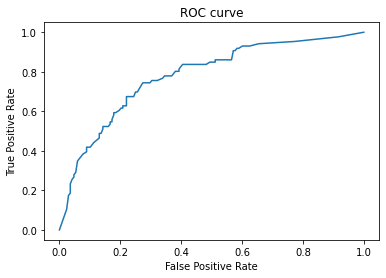

In [119]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

### Logistic Regression

In [72]:
lr = LogisticRegression(max_iter=10000, tol=0.01)

In [73]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "C": np.logspace(-4, 4, 20)
}
search = GridSearchCV(lr, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.774):
{'C': 0.0006951927961775605}
Test accuracy:0.736


              precision    recall  f1-score   support

  No Diabete       0.79      0.83      0.81       168
     Diabete       0.62      0.56      0.59        86

    accuracy                           0.74       254
   macro avg       0.70      0.69      0.70       254
weighted avg       0.73      0.74      0.73       254



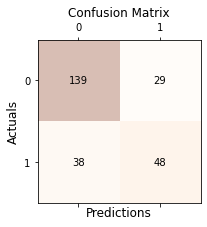

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_test)
y_pred_proba = search.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7850913621262459


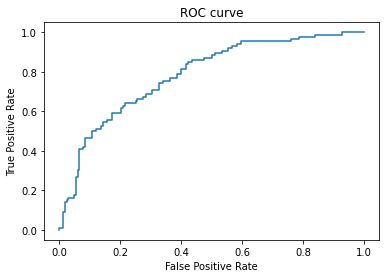

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [76]:
pipe = Pipeline(steps=[("MinMaxScaler", MinMaxScaler), ("selectK", selectK), ("lr", lr)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "selectK__k": range(1, X.shape[1]+1),
    "lr__C": np.logspace(-4, 4, 20),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.778):
{'lr__C': 78.47599703514607, 'selectK__k': 6}
Test accuracy:0.740


              precision    recall  f1-score   support

  No Diabete       0.79      0.83      0.81       168
     Diabete       0.63      0.57      0.60        86

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.74      0.74      0.74       254



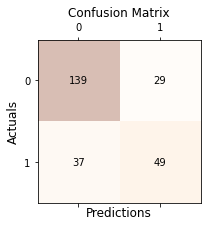

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_test)
y_pred_proba = search.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7935354374307863


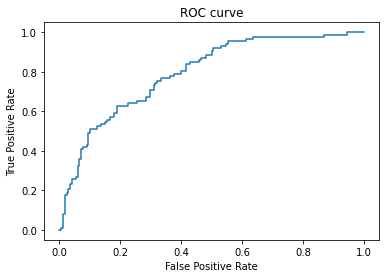

In [78]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [83]:
pca = PCA(n_components=8)

pipe = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("lr", lr)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "lr__C": np.logspace(-4, 4, 20),
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.772):
{'lr__C': 0.615848211066026}
Test accuracy:0.736


              precision    recall  f1-score   support

  No Diabete       0.80      0.81      0.80       168
     Diabete       0.61      0.59      0.60        86

    accuracy                           0.74       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.73      0.74      0.74       254



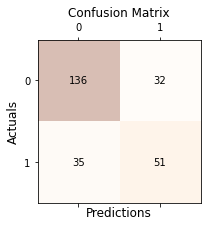

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_test)
y_pred_proba = search.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7996262458471761


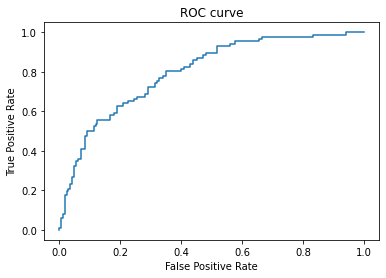

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

In [123]:
lr = LogisticRegression(max_iter=10000, tol=0.01)

In [124]:
param_grid = {
    "C": np.logspace(-4, 4, 20),
}
search = GridSearchCV(lr, param_grid, n_jobs=2)
search.fit(X_lda_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_lda_test, y_test))

Best parameter (CV score=0.780):
{'C': 4.281332398719396}
Test accuracy:0.736


              precision    recall  f1-score   support

  No Diabete       0.80      0.80      0.80       168
     Diabete       0.61      0.60      0.61        86

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.74      0.74      0.74       254



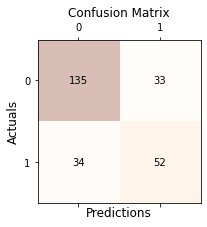

In [125]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_lda_test)
y_pred_proba = search.predict_proba(X_lda_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7987264673311185


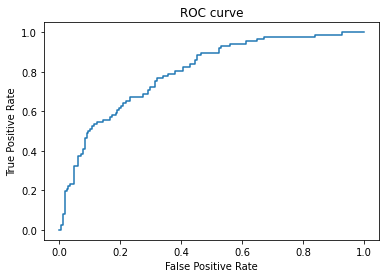

In [126]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

  No Diabete       0.81      0.74      0.77       168
     Diabete       0.56      0.66      0.61        86

    accuracy                           0.71       254
   macro avg       0.69      0.70      0.69       254
weighted avg       0.73      0.71      0.72       254



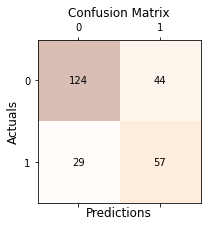

In [87]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7004429678848284


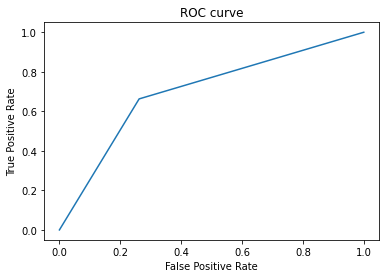

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [89]:
dt = DecisionTreeClassifier()

In [90]:
pipe = Pipeline(steps=[("MinMaxScaler", MinMaxScaler), ("selectK", selectK), ("dt", dt)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "selectK__k": range(1, X.shape[1]+1)
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.726):
{'selectK__k': 7}
Test accuracy:0.685


              precision    recall  f1-score   support

  No Diabete       0.76      0.76      0.76       168
     Diabete       0.53      0.53      0.53        86

    accuracy                           0.69       254
   macro avg       0.65      0.65      0.65       254
weighted avg       0.69      0.69      0.69       254



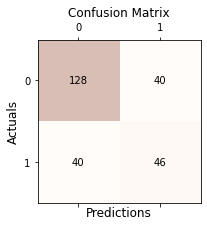

In [91]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_test)
y_pred_proba = search.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.6483942414174971


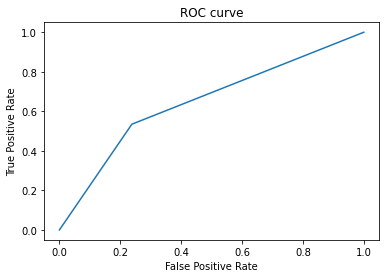

In [92]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [93]:
pca = PCA(n_components=8)

search = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("dt", dt)])

search.fit(X_train, y_train)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Test accuracy:0.673


              precision    recall  f1-score   support

  No Diabete       0.75      0.75      0.75       168
     Diabete       0.52      0.52      0.52        86

    accuracy                           0.67       254
   macro avg       0.64      0.64      0.64       254
weighted avg       0.67      0.67      0.67       254



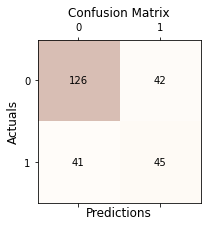

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_test)
y_pred_proba = search.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.6366279069767442


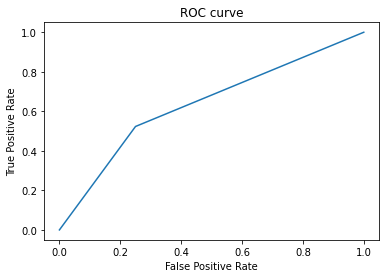

In [95]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

In [128]:
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
dt.fit(X_lda_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

  No Diabete       0.79      0.76      0.77       168
     Diabete       0.56      0.62      0.59        86

    accuracy                           0.71       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.72      0.71      0.71       254



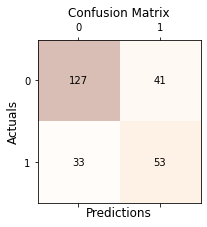

In [129]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dt.predict(X_lda_test)
y_pred_proba = dt.predict_proba(X_lda_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.6861157253599114


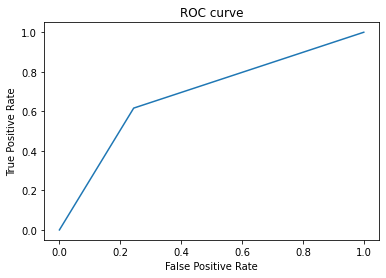

In [130]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

### Random Forest

In [33]:
from sklearn.model_selection import cross_val_score

estimator = RandomForestClassifier(random_state=0)
scores = cross_val_score(estimator, X, y, cv=5)
# impute_scores.append(scores)
print('%.3f (%.3f)' % (np.mean(scores), np.std(scores)))

0.779 (0.034)


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create Decision Tree classifer object
dt = RandomForestClassifier(random_state=0)

# Train Decision Tree Classifer
dt.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

  No Diabete       0.80      0.81      0.81       168
     Diabete       0.62      0.62      0.62        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



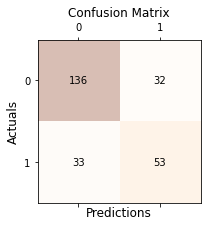

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.809939091915836


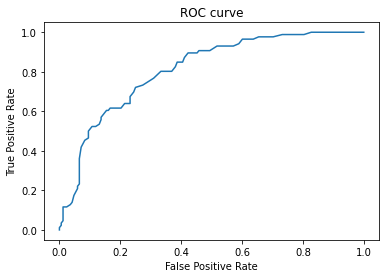

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [19]:
dt = RandomForestClassifier(random_state=0)

In [20]:
pipe = Pipeline(steps=[("MinMaxScaler", MinMaxScaler), ("selectK", selectK), ("dt", dt)])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "selectK__k": range(1, X.shape[1]+1)
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Best parameter (CV score=0.772):
{'selectK__k': 7}
Test accuracy:0.740


              precision    recall  f1-score   support

  No Diabete       0.80      0.80      0.80       168
     Diabete       0.62      0.62      0.62        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



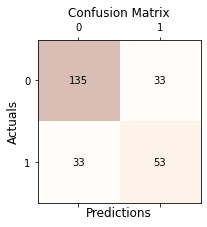

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_test)
y_pred_proba = search.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.8061323366555925


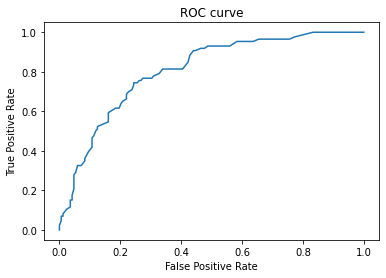

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [23]:
pca = PCA(n_components=8)

search = Pipeline(steps=[("scaler", scaler), ("pca", pca), ("dt", dt)])

search.fit(X_train, y_train)
print("Test accuracy:%0.3f" % search.score(X_test, y_test))

Test accuracy:0.732


              precision    recall  f1-score   support

  No Diabete       0.80      0.80      0.80       168
     Diabete       0.60      0.60      0.60        86

    accuracy                           0.73       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.73      0.73      0.73       254



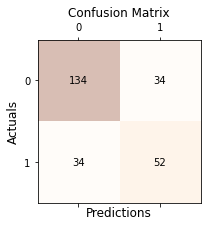

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = search.predict(X_test)
y_pred_proba = search.predict_proba(X_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7821497785160575


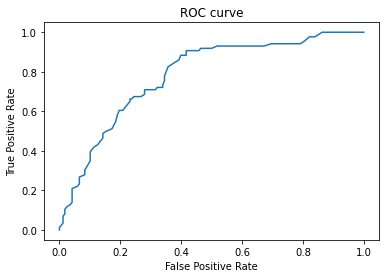

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier(random_state=0)
dt.fit(X_lda_train, y_train)

RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

  No Diabete       0.79      0.76      0.77       168
     Diabete       0.56      0.62      0.59        86

    accuracy                           0.71       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.72      0.71      0.71       254



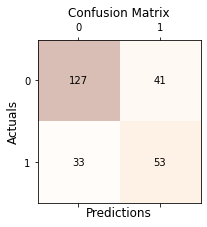

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix

y_pred = dt.predict(X_lda_test)
y_pred_proba = dt.predict_proba(X_lda_test)[:, 1]

target_names = ['No Diabete', 'Diabete']
print(classification_report(y_test, y_pred, target_names=target_names))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

Area under the Receiver Operating Characteristic curve: 0.7655038759689923


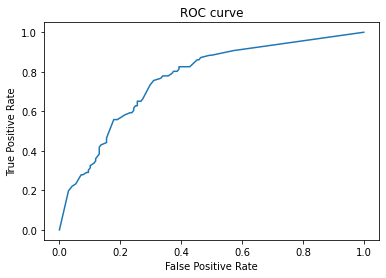

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

### Evaluation

https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

https://towardsdatascience.com/understanding-confusion-matrix-precision-recall-and-f1-score-8061c9270011